In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Concatenate, Input
from tensorflow.keras.models import Model, Sequential

In [50]:
from sklearn.datasets import make_moons, make_regression, make_classification, make_blobs, make_biclusters
from sklearn.model_selection import train_test_split

## Regressão

In [49]:
X, y = make_regression(n_samples=1000, n_features=1, n_informative=10, n_targets=2)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
X.shape, y.shape

((1000, 1), (1000, 2))

In [53]:
df = pd.concat([pd.DataFrame(X, columns=["X"]), pd.DataFrame(y, columns=["y1", "y2"])], axis=1)
df.head()

,X,y1,y2
0,1.787512,166.604736,23.239885
1,0.808015,75.310886,10.505201
2,0.323431,30.145363,4.205011
3,-0.861754,-80.319627,-11.203876
4,1.998803,186.298139,25.986940


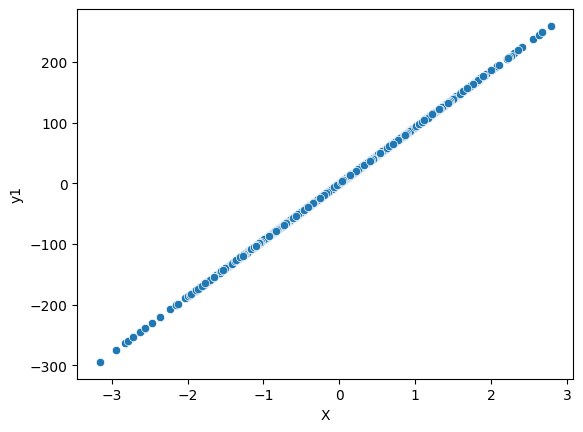

In [54]:
sns.scatterplot(data=df, x="X", y="y1");

In [56]:
input_ = Input(1)
hidden1 = Dense(10, activation="relu", name="Hidden1")(input_)
hidden2 = Dense(100, activation="relu", name="Hidden2")(hidden1)
hidden3 = Dense(100, activation="relu", name="Hidden3")(hidden2)
output = Dense(2, activation="linear", name="Output_Main")(hidden3)
aux_output = Dense(2, activation="linear", name="Aux_Output")(hidden1)
model = Model(inputs=[input_], outputs=[output, aux_output])

In [57]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 Hidden1 (Dense)             (None, 10)                   20        ['input_5[0][0]']             
                                                                                                  
 Hidden2 (Dense)             (None, 100)                  1100      ['Hidden1[0][0]']             
                                                                                                  
 Hidden3 (Dense)             (None, 100)                  10100     ['Hidden2[0][0]']             
                                                                                            

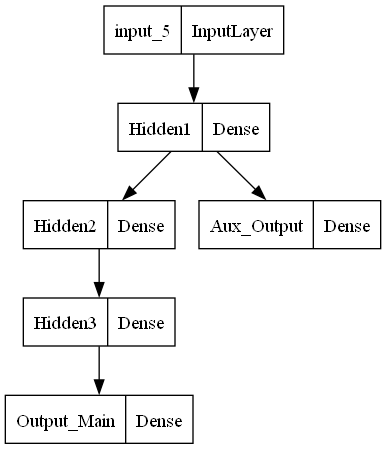

In [58]:
keras.utils.plot_model(model)

In [59]:
model.compile(loss="mse", metrics=[keras.metrics.R2Score()], optimizer="adam")

In [61]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
 1/25 [>.............................] - ETA: 0s - loss: 3159.3054 - Output_Main_loss: 10.4065 - Aux_Output_loss: 3148.8989 - Output_Main_r2_score: 0.9965 - Aux_Output_r2_score: 0.1592

25/25 [==============================] - 0s 6ms/step - loss: 4033.3054 - Output_Main_loss: 10.0522 - Aux_Output_loss: 4023.2542 - Output_Main_r2_score: 0.9974 - Aux_Output_r2_score: 0.1871 - val_loss: 3495.3345 - val_Output_Main_loss: 7.9647 - val_Aux_Output_loss: 3487.3696 - val_Output_Main_r2_score: 0.9977 - val_Aux_Output_r2_score: 0.1956
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 4013.3237 - Output_Main_loss: 7.7666 - Aux_Output_loss: 4005.5566 - Output_Main_r2_score: 0.9980 - Aux_Output_r2_score: 0.1980 - val_loss: 3478.5215 - val_Output_Main_loss: 6.3862 - val_Aux_Output_loss: 3472.1353 - val_Output_Main_r2_score: 0.9980 - val_Aux_Output_r2_score: 0.2065
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 3992.5723 - Output_Main_loss: 5.4714 - Aux_Output_loss: 3987.1008 - Output_Main_r2_score: 0.9986 - Aux_Output_r2_score: 0.2092 - val_loss: 3461.3469 - val_Output_Main_loss: 5.2171 - val_Aux_Output_loss: 3456.1299 - val_Output_Ma

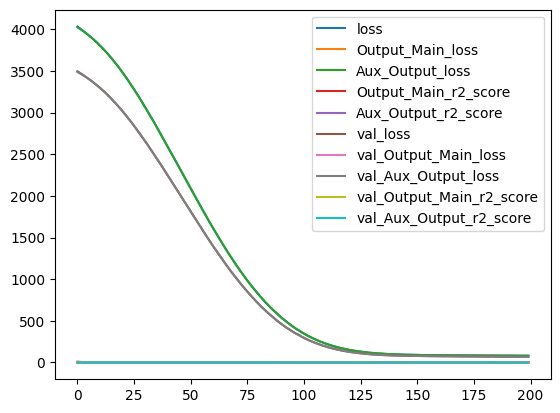

In [62]:
pd.DataFrame(history.history).plot();

## Classificação

In [76]:
x, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42, n_classes=5)

In [77]:
x.shape, y.shape

((1000, 20), (1000,))

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [100]:
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y, columns=["y"])], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,y
0,0.409623,-1.683728,-0.394460,1.551764,-0.480627,0.484559,0.145104,0.821107,-2.121488,-0.516468,...,2.085328,-2.038624,0.451742,0.796588,-0.870078,-1.371941,1.064374,-4.236189,2.016521,2
1,3.384260,-0.784101,-2.848742,0.799852,2.037265,-0.853791,-0.140066,1.046648,1.629854,-0.075812,...,-0.761928,-4.590908,-0.232606,2.816156,2.298918,1.267045,-0.492158,-7.699431,0.999743,4
2,1.170309,0.641811,1.612102,-4.047619,1.918799,-4.241353,-0.117104,0.364829,1.060276,-1.437106,...,0.538741,1.845261,0.595538,0.205212,2.879148,0.338929,-3.330786,7.248982,-4.108592,1
3,1.757996,0.901402,-2.513602,6.934682,-4.178856,1.611234,0.400218,-0.148679,0.167152,0.994879,...,-0.944529,-3.513916,1.144093,-0.733333,0.117414,0.234605,0.781257,-4.864180,2.752119,3
4,0.780572,1.130162,-1.081402,1.863327,0.480561,0.666243,0.816555,0.639293,-0.840296,0.914478,...,-0.652871,-0.358365,1.711760,2.017991,-0.910042,-0.638289,2.067668,-2.755464,-1.074587,1


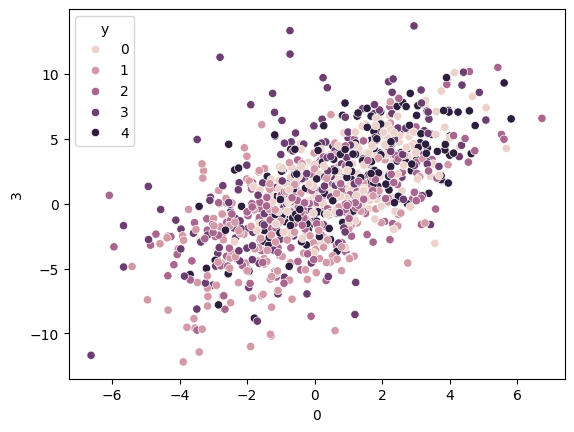

In [104]:
sns.scatterplot(data=df, x=0, y=3, hue="y");

In [84]:
pd.DataFrame(y).value_counts().count()

5

In [95]:
input_ = Input(20)
hidden1 = Dense(100, activation="relu", name="Hidden1")(input_)
hidden2 = Dense(100, activation="relu", name="Hidden2")(hidden1)
hidden3 = Dense(100, activation="relu", name="Hidden3")(hidden2)
output = Dense(5, activation="softmax", name="Output")(hidden3)
aux_output = Dense(5, activation="softmax", name="Auxoutput")(hidden1)
model = Model(inputs=[input_], outputs=[output, aux_output])

In [96]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [98]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6319 - Output_loss: 0.0806 - Auxoutput_loss: 0.5513 - Output_accuracy: 0.9837 - Auxoutput_accuracy: 0.8263 - val_loss: 1.8355 - val_Output_loss: 0.9945 - val_Auxoutput_loss: 0.8410 - val_Output_accuracy: 0.7500 - val_Auxoutput_accuracy: 0.6900
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5985 - Output_loss: 0.0619 - Auxoutput_loss: 0.5366 - Output_accuracy: 0.9950 - Auxoutput_accuracy: 0.8413 - val_loss: 1.9450 - val_Output_loss: 1.1025 - val_Auxoutput_loss: 0.8425 - val_Output_accuracy: 0.7600 - val_Auxoutput_accuracy: 0.6850
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5737 - Output_loss: 0.0526 - Auxoutput_loss: 0.5211 - Output_accuracy: 0.9987 - Auxoutput_accuracy: 0.8462 - val_loss: 1.9637 - val_Output_loss: 1.1278 - val_Auxoutput_loss: 0.8359 - val_Output_accuracy: 0.7300 - val_Auxoutput_accuracy: 0.6900
Epoch 4/200
25/25 [========================

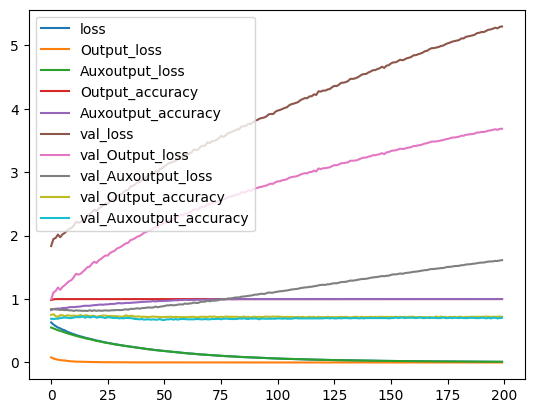

In [99]:
pd.DataFrame(history.history).plot();

## Blobs

In [112]:
x, y = make_blobs(n_samples=1000)

In [113]:
x.shape, y.shape

((1000, 2), (1000,))

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [114]:
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y, columns=["y"])], axis=1)
df.head()

,0,1,y
0,-2.385733,-8.704112,0
1,-3.774830,-10.373765,0
2,0.818135,-9.489922,1
3,-0.707226,-10.295093,1
4,-0.275324,-10.240191,0


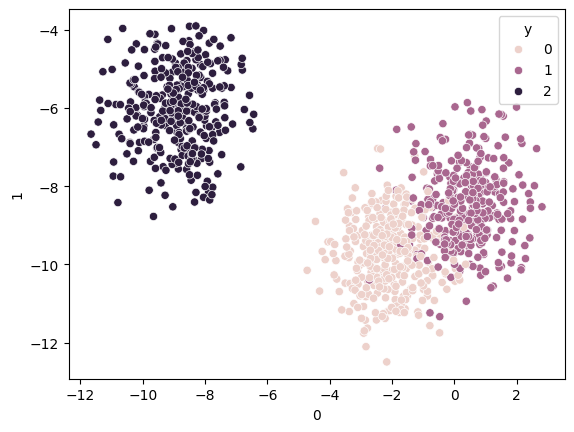

In [115]:
sns.scatterplot(data=df, x=0, y=1, hue="y");

In [121]:
input_ = Input(2)
hidden1 = Dense(100, activation="relu", name="Hidden1")(input_)
hidden2 = Dense(100, activation="relu", name="Hidden2")(hidden1)
hidden3 = Dense(100, activation="relu", name="Hidden3")(hidden2)
output = Dense(3, activation="softmax", name="Output")(hidden3)
aux_output = Dense(3, activation="softmax", name="Auxoutput")(hidden1)
model = Model(inputs=[input_], outputs=[output, aux_output])

In [122]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [123]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
25/25 [==============================] - 2s 16ms/step - loss: 1.5653 - Output_loss: 0.5873 - Auxoutput_loss: 0.9780 - Output_accuracy: 0.8138 - Auxoutput_accuracy: 0.4762 - val_loss: 0.9290 - val_Output_loss: 0.2884 - val_Auxoutput_loss: 0.6406 - val_Output_accuracy: 0.9150 - val_Auxoutput_accuracy: 0.6500
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7531 - Output_loss: 0.2198 - Auxoutput_loss: 0.5333 - Output_accuracy: 0.9275 - Auxoutput_accuracy: 0.8612 - val_loss: 0.6405 - val_Output_loss: 0.1997 - val_Auxoutput_loss: 0.4407 - val_Output_accuracy: 0.9200 - val_Auxoutput_accuracy: 0.8950
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5788 - Output_loss: 0.1823 - Auxoutput_loss: 0.3966 - Output_accuracy: 0.9350 - Auxoutput_accuracy: 0.9212 - val_loss: 0.5477 - val_Output_loss: 0.1986 - val_Auxoutput_loss: 0.3491 - val_Output_accuracy: 0.9100 - val_Auxoutput_accuracy: 0.9200
Epoch 4/200
25/25 [=======================

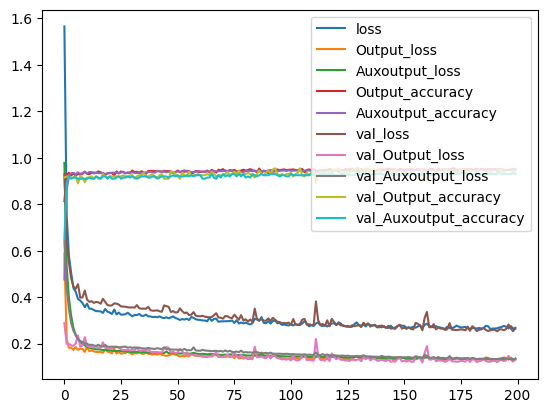

In [127]:
pd.DataFrame(history.history).plot();

## Moons

In [128]:
x, y = make_moons(n_samples=1000, noise=0.1)

In [129]:
x.shape, y.shape

((1000, 2), (1000,))

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [131]:
df = pd.concat([pd.DataFrame(x), pd.DataFrame(y, columns=["y"])], axis=1)
df.head()

,0,1,y
0,1.818034,-0.073941,1
1,0.218895,-0.075903,1
2,1.802923,-0.238609,1
3,0.822695,0.103948,0
4,-1.065417,0.213854,0


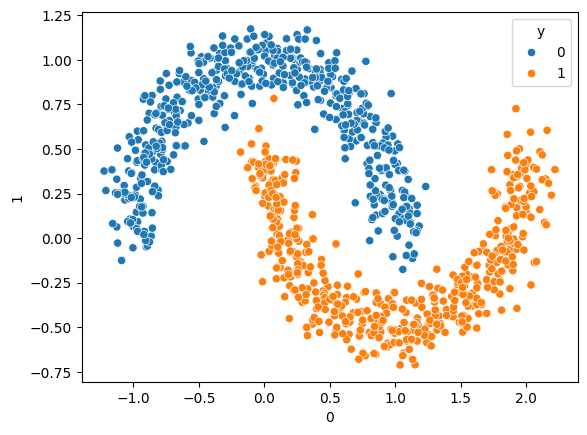

In [132]:
sns.scatterplot(data=df, x=0, y=1, hue="y");

In [133]:
input_ = Input(2)
hidden1 = Dense(100, activation="relu", name="Hidden1")(input_)
hidden2 = Dense(100, activation="relu", name="Hidden2")(hidden1)
hidden3 = Dense(100, activation="relu", name="Hidden3")(hidden2)
output = Dense(3, activation="softmax", name="Output")(hidden3)
aux_output = Dense(3, activation="softmax", name="Auxoutput")(hidden1)
model = Model(inputs=[input_], outputs=[output, aux_output])

In [134]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"], optimizer="adam")

In [135]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
25/25 [==============================] - 2s 17ms/step - loss: 1.7316 - Output_loss: 0.7672 - Auxoutput_loss: 0.9644 - Output_accuracy: 0.7875 - Auxoutput_accuracy: 0.7262 - val_loss: 1.1986 - val_Output_loss: 0.3746 - val_Auxoutput_loss: 0.8240 - val_Output_accuracy: 0.8850 - val_Auxoutput_accuracy: 0.8850
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 1.0584 - Output_loss: 0.3219 - Auxoutput_loss: 0.7365 - Output_accuracy: 0.8612 - Auxoutput_accuracy: 0.8587 - val_loss: 0.8170 - val_Output_loss: 0.2130 - val_Auxoutput_loss: 0.6039 - val_Output_accuracy: 0.9050 - val_Auxoutput_accuracy: 0.8850
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.8292 - Output_loss: 0.2533 - Auxoutput_loss: 0.5759 - Output_accuracy: 0.8775 - Auxoutput_accuracy: 0.8487 - val_loss: 0.6692 - val_Output_loss: 0.2042 - val_Auxoutput_loss: 0.4650 - val_Output_accuracy: 0.9150 - val_Auxoutput_accuracy: 0.8900
Epoch 4/200
25/25 [=======================

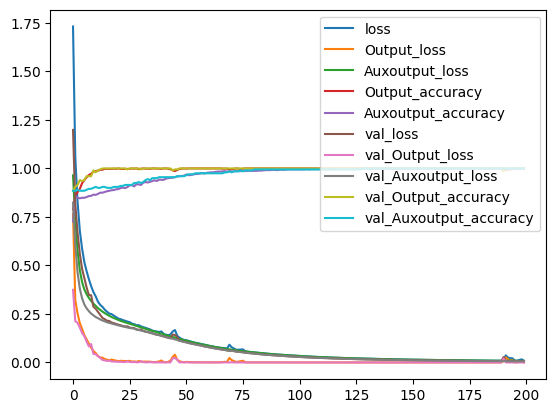

In [136]:
pd.DataFrame(history.history).plot();

## Biclusters

In [143]:
x = make_biclusters(n_clusters=5, noise=0.1, shape=(3, 3))